<a href="https://colab.research.google.com/github/pillaisamarth/clg-proj/blob/main/ClgProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
tech_list = [
    'GOOG',
    'MSFT'
]

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stocks in tech_list:
    globals()[stocks] = yf.download(stocks, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [58]:
company_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [79]:
df = pd.DataFrame(GOOG[['Adj Close']].copy())
df.head()

,Adj Close
Date,
2020-10-15 00:00:00-04:00,77.956497
2020-10-16 00:00:00-04:00,78.650497
2020-10-19 00:00:00-04:00,76.730499
2020-10-20 00:00:00-04:00,77.796501
2020-10-21 00:00:00-04:00,79.665497


In [80]:
df.describe()

,Adj Close
count,504.000000
mean,119.402750
std,19.425299
min,75.831001
25%,104.730249
50%,118.825001
75%,137.012375
max,150.709000


Text(0.5, 1.0, 'Plot for Google stock price time series')

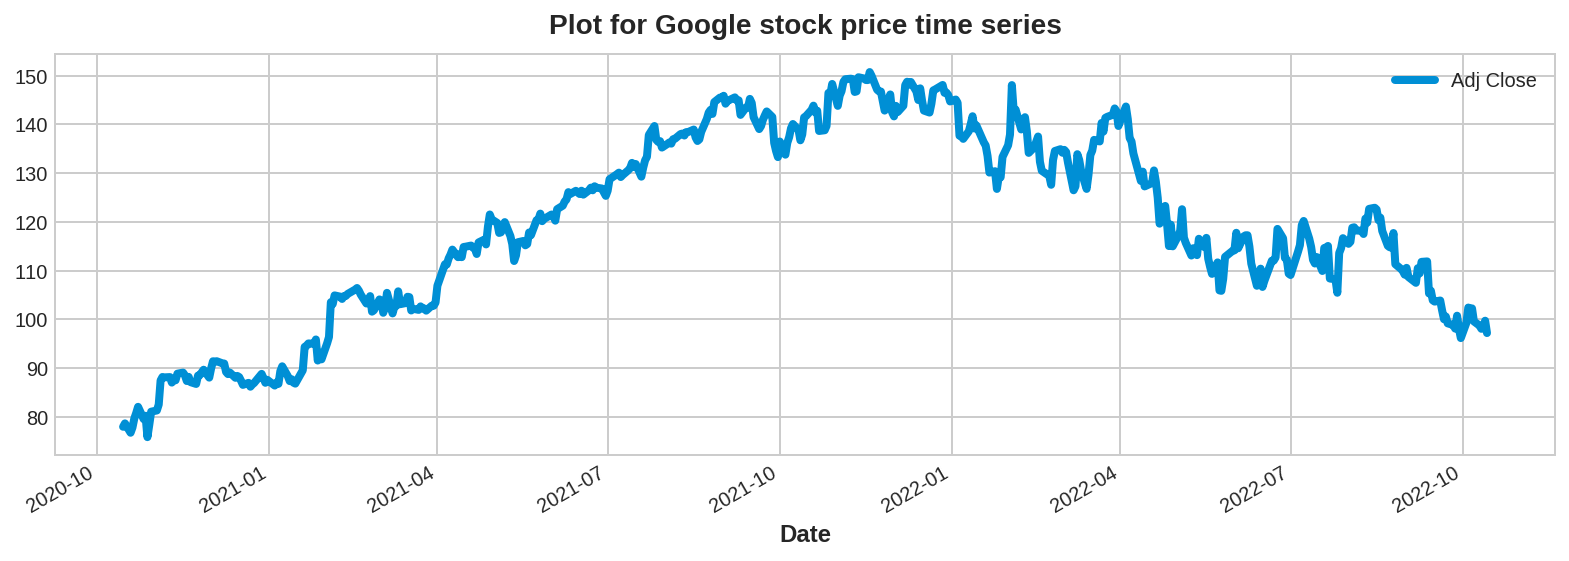

In [81]:
ax = df.plot()
ax.set_title('Plot for Google stock price time series')

In [82]:
df['time'] = np.arange(len(df.index))
df.head(5)

,Adj Close,time
Date,,
2020-10-15 00:00:00-04:00,77.956497,0
2020-10-16 00:00:00-04:00,78.650497,1
2020-10-19 00:00:00-04:00,76.730499,2
2020-10-20 00:00:00-04:00,77.796501,3
2020-10-21 00:00:00-04:00,79.665497,4


In [63]:
def data_split(X, y, test_size = 0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = False)
  return (X_train, X_test, y_train, y_test)

In [64]:
X = df.loc[:, ['time']]
y = df.loc[:, ['Adj Close']]

X_train1, X_test1, y_train1, y_test1 = data_split(df.loc[:, ['time']], df.loc[:, ['Adj Close']])

model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

In [65]:
y_pred1 = pd.Series(model.predict(X_test1).reshape(-1), index = X_test1.index)

In [66]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test1, y_pred1)
print(error)

2236.070748193419


In [67]:
y_pred_train1 = pd.Series(model.predict(X_train1).reshape(-1), index = X_train1.index)
error_ = mean_squared_error(y_test1, y_pred1)
print(error_)

2236.070748193419


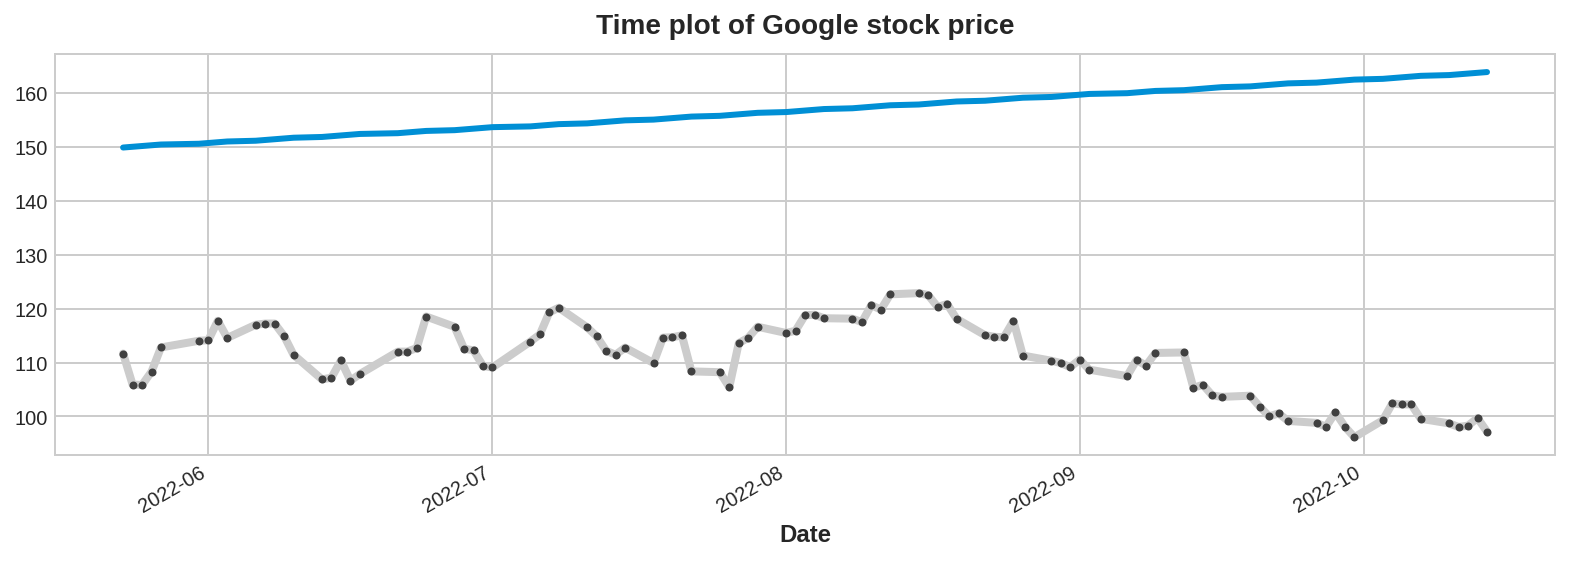

In [68]:
plot_params1 = plot_params
plot_params1['color'] = '0.8'
ax = y_test1.plot(**plot_params1)
ax = y_pred1.plot(ax=ax, linewidth=3)

ax.set_title('Time plot of Google stock price');

In [102]:
# Now implementing lag features
df_lg = df.copy()
lag = 20
df_lg[f'Lag_{lag}'] = df['Adj Close'].shift(lag)
df_lg.head()

,Adj Close,time,Lag_20
Date,,,
2020-10-15 00:00:00-04:00,77.956497,0,NaN
2020-10-16 00:00:00-04:00,78.650497,1,NaN
2020-10-19 00:00:00-04:00,76.730499,2,NaN
2020-10-20 00:00:00-04:00,77.796501,3,NaN
2020-10-21 00:00:00-04:00,79.665497,4,NaN


In [103]:
df_lg.dropna(inplace = True)
df_lg.head()

,Adj Close,time,Lag_20
Date,,,
2020-11-12 00:00:00-05:00,87.491997,20,77.956497
2020-11-13 00:00:00-05:00,88.850998,21,78.650497
2020-11-16 00:00:00-05:00,89.069000,22,76.730499
2020-11-17 00:00:00-05:00,88.507500,23,77.796501
2020-11-18 00:00:00-05:00,87.338997,24,79.665497


In [104]:
X_train2, X_test2, y_train2, y_test2 = data_split(df_lg.loc[:, [f'Lag_{lag}']], df_lg.loc[:, ['Adj Close']])

model1 = LinearRegression()
model1.fit(X_train2, y_train2)


LinearRegression()

In [105]:
X_train2

,Lag_20
Date,
2020-11-12 00:00:00-05:00,77.956497
2020-11-13 00:00:00-05:00,78.650497
2020-11-16 00:00:00-05:00,76.730499
2020-11-17 00:00:00-05:00,77.796501
2020-11-18 00:00:00-05:00,79.665497
...,...
2022-05-20 00:00:00-04:00,119.613998
2022-05-23 00:00:00-04:00,123.250000
2022-05-24 00:00:00-04:00,119.505997


In [106]:
y_pred2 = pd.Series(model1.predict(X_test2).reshape(-1), index = X_test2.index)
y_pred2.head()

Date
2022-05-27 00:00:00-04:00    117.804386
2022-05-31 00:00:00-04:00    119.614053
2022-06-01 00:00:00-04:00    120.417481
2022-06-02 00:00:00-04:00    124.090099
2022-06-03 00:00:00-04:00    119.274921
dtype: float64

In [107]:
y_pred_train2 = pd.Series(model1.predict(X_train2).reshape(-1), index = X_train2.index)
y_pred_train2.head()

Date
2020-11-12 00:00:00-05:00    87.228803
2020-11-13 00:00:00-05:00    87.802147
2020-11-16 00:00:00-05:00    86.215952
2020-11-17 00:00:00-05:00    87.096623
2020-11-18 00:00:00-05:00    88.640682
dtype: float64

In [108]:
error1 = mean_squared_error(y_test2, y_pred2)
print(error1)

90.02484941126214


Text(0.5, 1.0, 'Comparison of real stock values and predicted stock values')

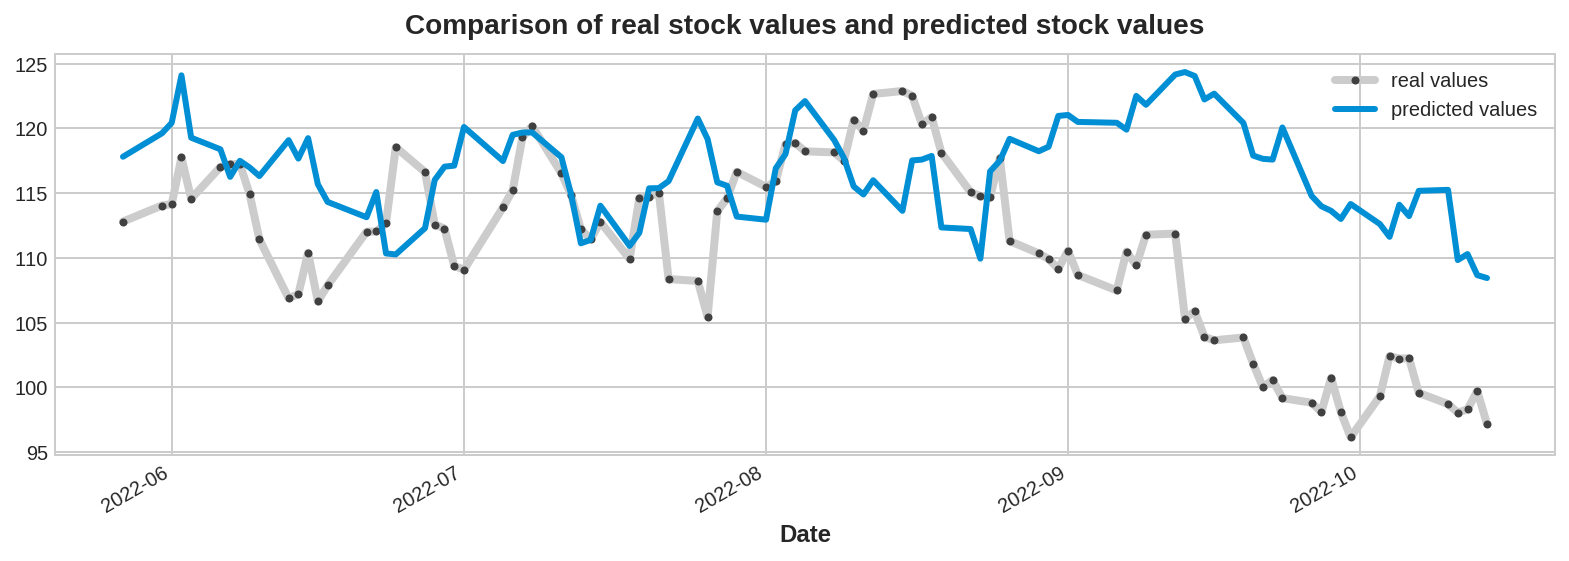

In [109]:
plot_params2 = plot_params
plot_params2['legend'] = True
ax = y_test2.plot(label='real time series', **plot_params)
ax = y_pred2.plot(ax=ax, linewidth=3)
ax.legend(['real values', 'predicted values'])
ax.set_title('Comparison of real stock values and predicted stock values')